In [ ]:
# import necessary packages
import pandas as pd
import numpy as np

In [ ]:
card_fraud = pd.read_csv('https://fraudcredit-analysis.s3.amazonaws.com/creditcard.csv')

In [ ]:
card_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# explore the features in the dataframe
card_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Display class labels

In [ ]:
# counting the incidence of fraud and no fraud in the transation
clbel = card_fraud['Class'].value_counts()
clbel


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# get the ratio of fraud cases: classes are highly imbalance
print(clbel/len(card_fraud))

0    0.998273
1    0.001727
Name: Class, dtype: float64


## Visualize the data

Text(0, 0.5, 'frequency')

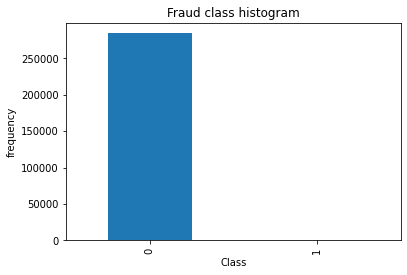

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
count_classes = pd.value_counts(card_fraud['Class'], sort = True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('frequency')

In [ ]:
def prep_data(df):
  """
  Prepare the data to train model
  args : df= dataframe
  returns: X array of colums
  y- class array to be predicted
  """
  X = card_fraud.iloc[:, 1:29]
  X = np.array(X).astype(np.float) # converting the values to numericals
  y = card_fraud.iloc[:, 30]
  y = np.array(y).astype(np.float) # target variable - class
  return X,y

def plot_data(X,y):
  plt.scatter(X[y == 0,0], X[y == 0,1], label='class #0', alpha=0.5, linewidths=0.15)
  plt.scatter(X[y == 1,0], X[y == 1,1], label='class #1', alpha=0.5, linewidth=0.5, c='r')
  plt.legend()
  return plt.show() 


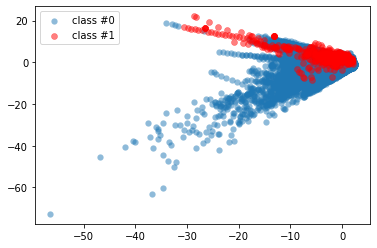

In [ ]:
# create X and y values from functions
X,y = prep_data(card_fraud)

#plot the data by running y and x
plot_data(X,y)

In [ ]:
card_fraud.iloc[0].count

<bound method Series.count of Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64>

In [ ]:
card_fraud.shape

(284807, 31)

## Handling the imbalance class
- by `Random Under Sampling(RUS)`: This reduces the majority class and makes the data balanced
- by `Random over Sampling(ROS)`: This generates duplicates of the minority class. Inefficient beacause of duplicacy
- by `Synthetic Minority Oversampling Technique(SMOTE)`: Generate fakes realistic data to balance out the data.
In this project we shall apply the SMOTE method

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


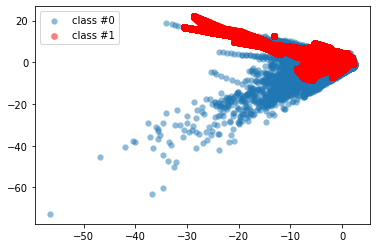

In [ ]:
from imblearn.over_sampling import SMOTE
X, y = prep_data(card_fraud)
method = SMOTE(kind='regular') # invoking the sampling method
X_resampled, y_resampled = method.fit_sample(X,y)
plot_data(X_resampled, y_resampled)

In [ ]:
def comapare_plot(X, y , X_resampled, y_resampled, method):
  # start a plot figure
  f, (ax1, ax2) = plt.subplots(1,2)
  
  #subplot number 1, this is our normal data
  c0 = ax1.scatter(X[y == 0,0], X[y == 0,1], label='Class #0', alpha = 0.5)
  c1 = ax1.scatter(X[y == 1,0], X[y == 1, 1], label='Class #1', alpha = 0.5, c='r')
  ax1.set_title('Original set')


  # sub-plot number 2 this is the oversampled data
  ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label='Class#0', alpha=.5)
  ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1,1], label='Class#1', alpha=.5,c='r')
  ax2.set_title(method)

  # some setting and ready to go
  plt.figlegend((c0,c1),('Class #0', 'Class#1'), loc='lower center', ncol=2, labelspacing=0.)
  plt.tight_layout(pad=3)
  return plt.show()


0.0    284315
1.0       492
dtype: int64
1.0    284315
0.0    284315
dtype: int64


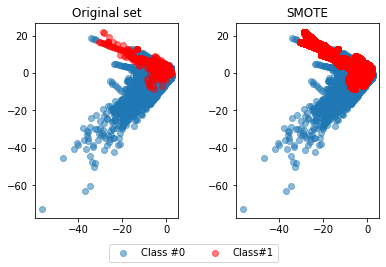

In [ ]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare plot
comapare_plot(X,y, X_resampled, y_resampled, method='SMOTE')

## Rule Base method of detecting Fraud
- This is the old way where a threshold is established and use to split the fraud class into fraudulent and Non-fraudulent transactions. often time statistics threshold are determined by taking the mean values of observation.

In [ ]:
# Get the mean for each group
card_fraud.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# implement a rule for stating which cases are flagged as fraud
card_fraud['flag_as_fraud'] = np.where(np.logical_and(card_fraud['V1'] < -3, card_fraud['V3'] < -5), 1,0)

# Create a crosstable of flagged fraud cases versus the actual fraud cases
pd.crosstab(card_fraud['Class'], card_fraud['flag_as_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud'])


Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


 > with this rule we detect 170 out of 492 fraud cases can't detect the other 322 and get 1226 false positives

## Using ML Classiification to detect and catch fraudsters
- we can see whether using logistic regression would improve the results from the rule base method

In [ ]:
 # importign sklearn for training splitting and importing classifier
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression

 from sklearn.metrics import classification_report
 from sklearn.metrics import confusion_matrix
 

In [ ]:
# create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to pur data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model prediction
predicted = model.predict(X_test)

# print the classificatiom report and confudion mastrix
print(f'Classification report:\n {classification_report(y_test,predicted)}')
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print(f'Confusion matrix:\n {conf_mat}')

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.89      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    11]
 [   56    91]]


> This is an improvement from the result of the rule base method as the number of false positive have reduced significantly

## Logistic Regression on SMOTE Resampled Data
- We shall apply the logistics regression on the SMOTE resampled data set i.e a balanced data set

In [ ]:
# the pipeline module
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE

# Define which resample method ML Model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2') # instead SMOTE(kind='boderline2')90
model = LogisticRegression()

# Define the pipeline, instruct it to combine SMOTE with the logistic Regression model
pipeline =Pipeline([('SMOTE',resampling), ('Logistic Regression', model)])

In [ ]:
# Split your data X and y, into a training and test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)

# Fit the results from the classification report and confusion matrix
print(f'Classfication report:\n {classification_report(y_test, predicted)}')
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print(f'Confusion matrix:\n {conf_mat}')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Classfication report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.07      0.88      0.13       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83632  1664]
 [   17   130]]


From the above result we can see that with resampling data and regression model, the results are worse than our previous results.